# Light Counting (Photometry) Notebook 

This notebook is the big step we've been working towards!

So far, we've figured out where each of our images is (plate solved), looked for things that might be stars (found peaks), examined those peaks in detail to see how (or if) the light was spread out, created rings encompasing each of the stars, and verified that there were no other stars in those rings that would complicate things.

That's a lot of work to have done, and a lot of python code to have gotten through. Now, the next step is to actually so the photometry. 'Photometry' comes from two Greek words; "light" and "measure", and in Astronomy, refers to the measurement of the Flux of an object.

In class, you'll (have) learn(ed) that Flux has units of energy per area per time; sometimes in Janskys (Jy) or other times in a series of SI units you have to examine to know whether it's specific intensity or another derived type of value.

There is a relation to convert the charge read by the CCD (telescope detector) back into photon energy units, but that  involves integrating over the band of wavelengths we're using, the amount of time we exposed our detetector, and converting square pixel area into solid angles in the sky, along with possibly even more things. Thankfully, we don't have to figure out how that converts.

Recall the key to being able to actually do calculations in astronomy: Dimensionless Ratios!

We could have whatever arbitrary units we wanted for a flux (as long as they were energy per area (per unit time)), such as "AA batteries per Astrophysics: Decoding The Cosmos (Second Edition) by Judith Irwin (hardcover, largest face)", and as long as we had another light source also measured in that bizzare unit, we could take their ratio and get a value we could compare with any other value (in our case, that will be the ratios from other points in time)

Now, we don't have that weird of a unit;
The value of a pixel is determined by the voltage that was read by the CCD for the associated area after it was exposed for the exposure time you chose. A pixel is a square, which is already an area, but we could use the WCS data we found to figure out a solid angle for each pixel, but that is a bit more work than we need (or want) to do. 

# Photometry Introduction and Process

To do the photometry, we will first take the "areas" we defined (our apertures). We will then open up an image, and put those apertures on top of them, and sum up the values for all of the pixels inside that area. That sum will be an energy, albeit on it arbitrary (though consistent!) units, and we have the area inside of which the sum was taken, and the unit of time we exposed for. Thus, the value we have counted up is **A Flux!**

However, it is not the flux of our star; there is background noise in the image. If we want the Flux of a star, we need to subtract the extra energy added by the background. 

#### Background Subtraction (Tangent)

The easiest way to get rid of the background noise energy would have been to find an area with no stars, find out what the average pixel value was inside it, and then subtract that one average value from every pixel in the image.

We've instead opted for the slightly more complicated, but more accurate version. Around each of our stars, we've established a (symmetrical) area with no stars. If you remember from your electromagnetism course (or some other course that covered it), if you integrate around a point source (or any source entirely contained) there is no difference in emission between the directions (the word that would be used is "Flux" but I think it would be confusing to use that word given the flux from stars we're looking for). Basically, the point is, if we consider all around our source, we can figure out how much would've been inside, even if the background varies (ie, has some gradient)

#### Background Subtraction (in practice)

For our analysis, we will need to extract some specific values in order to determine the flux. We will (approxtimate to a very good degree) the background in our circle by finding **the area of that circle in pixel units**, and then finding the **average pixel value in the annulus** around it, and multiplying the two together.
$$ F_{Background} = A_{aperture} \times \overline{F}_{pixel} $$

We will determine the total flux for the aperture by counting up the pixel values inside, and we will find the flux of the star by subtracting the background flux from the total:
$$ F_{Measured} = \sum_{n}^{all pixels}{F_{pixel}} $$

$$ F_{Star} = F_{Measured} - F_{Background} $$

----
## Individual Task:
To practice and implement this yourself, find those three fluxes for the following (fake) image of a star. You can do this either manually step by step in a cell, or you can fill in and use the functions I've created. We wont use these specific functions you write again (because I don't know how to check you did it right automatically...), but `QAOP_photometry` has it's own versions of those functions, and they are what we will eventually use when we loop over the real data.

(Hint: the image is a 25x25 pixels and the source is located at the centre, and is spread out with a RADIUS of 5 pixels. As well, the background is flat across the whole image.)

The image (2D array) is `practice_image`

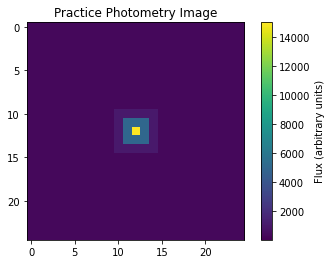

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from QAOP.test import makePracticeImage

practice_image = makePracticeImage()

norm=mpl.colors.Normalize(vmin=1)
plt.imshow(practice_image,norm=norm)
plt.title("Practice Photometry Image")
plt.colorbar(label="Flux (arbitrary units)")
plt.show()

In [ ]:
#Either fill in the process in this cell, or fill out and then use the functions in the following cell.

In [ ]:
def findApertureArea(img=practice_image):
    #Fill in this function
    return aperture_area

def findAverageBackground(img=practice_image):
    #Fill in this Function!
    return average_value

def findBackgroundFlux(aperture_area,average_value,img=practice_image):
    #Fill in this Function!
    return background_flux

def findTotalFlux(set_of_pixels,img=practice_image):
    #Fill in this Function!
    return total_flux

def findFluxOfStar(background_flux,total_flux):
    return total_flux - background_flux

Hopefully you've done that and succesfully the right value for the flux of the star. To check you're right, you can scroll down to the bottom of the page and look at what the answer is.

Understanding the practical steps of how photometry is done was one of the major improvements we wanted to include in this project, and breaking down and having to do those steps manually helped me understand what was going on so much better.

-----

## What Changes For The Real Photometry

As you may have noticed, that practice image isn't a real picture of the stars. There are a number of things that are different for when we do it.

The first is that we already have the definitions of the apertures. In the example above, you should have defined your aperture to be a rectangle covering the 'star'. You could have found your background either with an area around that rectangle, or any area anywhere in the image.

For the real data, we will be running for multiple images, though this is a pretty simple adaptation, and we just repeat the single image process over and over again.

Obviously, our apertures that we already created are circles, not rectangles, but the pixels we have are still squares.
This doesn't make things impossible, but it does add the complication that we would need to deal with that somehow. One way would be to simply say that a pixel is either entirely inside the area, or outside, based on whether the centre of the pixel would be inside or outside the circle. This works well for large apertures, but ours are only a few pixels big. The next step would be to figure out how much of the pixels area is inside the circle, and then add that fraction of the pixel's value, which is the best thing I would consider trying to do manually. The hardest thing, which the package we import, does, is to not only find the area/overlap between circle and pixel, but also consider the gradient of pixel value 'inside' the pixel based on the surrouning pixels, and then integrate that function over the area.

The other big complication is that the images move. The telescope has to move opposite the Earth's rotation in order to keep the same stars visible, and, while it is incredibly good at doing so, it is not so perfect that the stars stay on the same pixels.
One way to deal with this would be to take all of our images, and stack them up on top of each other so that the stars stay in the same place over the whole observing session. The other way is to define everything relative to some coordinate system, and then transform between that system and each image's pixel coordinate system. This is what we have done; we added the WCS data to each image (how to get from the external coordinates to That Image's Pixel Coordinate system) and defined out apertures in this external coordinate system.

You may also be thinking "well, with my prior knowledge of geometric spaces and tranforms, I know that you can't directly map a sphere (the sky) onto a plane (a 2D image) without some form of distortions". That is absolutely right, and, thankfully, other people have already figured out how that mapping is related, and, when we use the packages we do, those distortions are accounted for!

## The specifics of how photometry will be done

Lets go through how the photometry will actually be done, and then once we've seen one go of it, we can loop through all of the images and apertures.

As with the other notebooks, we will need our QAOP code, and the path to our data. There's also some pretty typical imports we'll need, so I've included those here as well.

In [36]:
import sys
#My QAOP folder is in: /Users/aidanmcclung/Desktop/Summer_Exoplanets

codeFilePath = '/Users/aidanmcclung/Desktop/Summer_Exoplanets/'  #/QAOP/ <- folder containing QAOP folder.
sys.path.append(codeFilePath) #this lets python know to look here for import statements

#we also will want to know where our data and images are
from QAOP.QAOP_utils import readConfigFile
extraCodeFilePath, dataFilePath, errormsg = readConfigFile( configPath= codeFilePath + 'QAOP/')
print(errormsg) 
#print(dataFilePath)#you can check this looks right

from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

#import QAOP
#help(QAOP.QAOP_utils) #Even I can't always remember what I named a function...
from QAOP.QAOP_utils import getTimeFromDate



no errors


Next, lets load up an image and it's data, as well as a row from our aperture table to test with:

In [40]:
with fits.open(dataFilePath+'output/001.fits') as hdul:
    sample_wcs = WCS(hdul[0].header)
    sample_image = hdul[0].data
    sample_datetime = hdul[0].header["date-obs"]

apertureTable = Table.read(dataFilePath+'apertures.csv')

sample_row = apertureTable[-1]
print(sample_row) #I tried to get the target to test with; you can check thats it

 Name      RA            DEC               r                r_in              r_out       
------ ---------- ----------------- ---------------- ------------------ ------------------
target 303.381875 65.16233055555556 5.27174113018153 13.179352825453826 23.722835085816886


----

Now, the central pillar of this process will be an `Aperture` object from the `photutils` package. 

These come in a lot of varients, but we are particularly interested in the `SkyCircularAperture` and `SkyCircularAnnulus`. There are "Sky" and non-"sky" variants of each aperture shape, with the Sky version requiring a `SkyCoord` object in order to be defined, and a `WCS` object in order to to be used.

Lets get our values from the aperture table row, and then create that Aperture object:

In [35]:
from photutils.aperture import SkyCircularAperture, SkyCircularAnnulus

In [42]:
sample_sc = SkyCoord(ra=sample_row['RA']*u.deg,dec=sample_row['DEC']*u.deg)
sample_name = sample_row['Name']
sample_radius = sample_row['r'] * u.arcsec

sample_Aperture = SkyCircularAperture(positions=sample_sc,r=sample_radius)

-----
So, what is this aperture object?

It has a few parameters we can access, like it's position and radius, but is much more useful when passed as a parameter to two methods from the same `photutils.aperture` pacakge: `ApertureStats()` and `aperture_photometry()`

The first will give you some of the facts about the aperture: the average pixel value inside it, the area it covers, etc... This is returned as an `ApertureStats` object with parameters for the various values.

The second will sum up all of the pixels inside the aperture, and return a `Table` with the results.

As well, `Apertures` themselves have a few helpful methods, one of the most important of which is `to_pixel()`, which takes in a WCS object and returns the equivalent aperture in pixel coordinates. The "Sky to Pixel" conversion is done automatically when calling `ApertureStats` if we pass it a WCS object as well, so we don't have to use `to_pixel()` in most of our code.

One place to use it is to get access to the pixel-based apertures `plot()` method, as in the following cell, if we want to see what the apertures look like on our image.

*note: when defining an aperture object, you can actually give it as many positions as you would like. This is why aperture_photometry returns a table; because each row would correspond to a position in the aperture object*

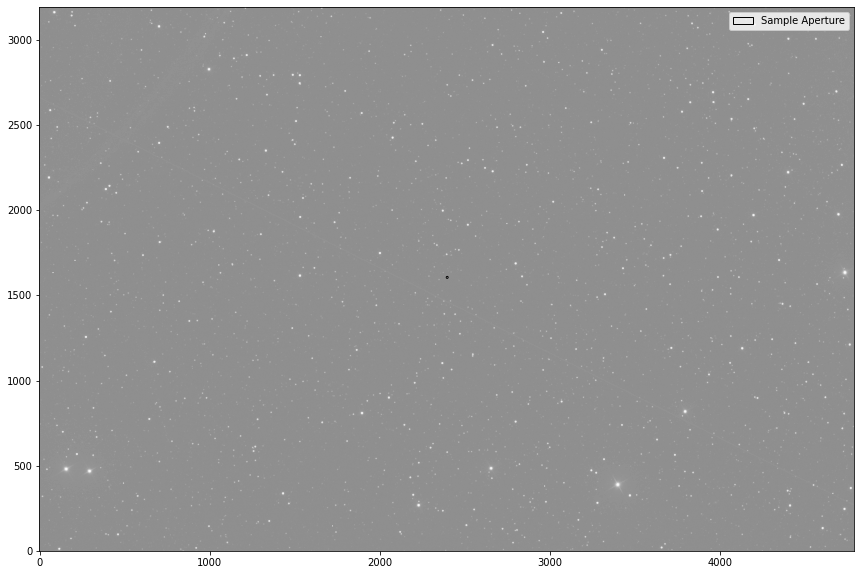

In [49]:
plt.figure(figsize=(16,10))
plt.imshow(sample_image, cmap='Greys_r', origin='lower', norm=mpl.colors.LogNorm(vmin=1))
sample_Aperture.to_pixel(wcs=sample_wcs).plot(label='Sample Aperture')
plt.legend()
#if your aperture is really small (like it probably is) you can zoom in:
#plt.xlim(2000,3000)
#plt.ylim(1500,2000)
plt.show()

In [50]:
from photutils.aperture import ApertureStats, aperture_photometry

In [60]:
#So, what kind of things are going on?
sample_stats = ApertureStats(sample_image,sample_Aperture,wcs=sample_wcs)
print(sample_stats.to_table()) #a lot more things in this table than we need.

 id     xcentroid          ycentroid     ...    orientation       eccentricity  
                                         ...        deg                         
--- ------------------ ----------------- ... ----------------- -----------------
  1 2394.9736735686797 1606.392405488009 ... 9.618920319429252 0.149846699968136


In [64]:
print("The aperture area is", sample_stats.sum_aper_area)

print("The median pixel value in the aperture is", sample_stats.median)

The aperture area is 103.40478480512553 pix2
The median pixel value in the aperture is 750.9028930664062


In [72]:
#And what about aperture_photometry?

sample_photometry = aperture_photometry(sample_image,sample_Aperture,wcs=sample_wcs)

print("Note the sum, which is the most important thing:",sample_photometry['aperture_sum'].data[0])
#recall the result is a table; getting ['aperture_sum'].data is the column as a list, and we want the first item

sample_photometry.show_in_notebook()

Note the sum, which is the most important thing: 252401.06080609106


idx,id,xcenter,ycenter,sky_center,aperture_sum
,,pix,pix,"deg,deg",
0,1,2395.1086250854305,1606.013677292265,"303.381875,65.16233055555556",252401.06080609106


# The QAOP_photometry module

So then, with those packages, all that remains for us is to do a lot of looping and repition, and save the values as we go.

We have to, for each image, find the 5 values associated with each star (the average background, aperture area, total flux, and then the background flux and star flux that we calculate).
The code we need to do each of these tasks has been neatly packaged into the `QAOP_photometry` module. There are methods in there that do everything we've done in this notebook, though they may have different names.

What we've has been pretty straightforward, but storing the data/results can get a bit complicated depending on how much of it you try to save.

To alleviate some of that difficulty, I wrote a class in `QAOP_photometry`: `photInstance`. The class will handle most of the routing and the calls to the various functions to get it all done. It stores an internal "master table" which is a higher dimensional table containing all of the information about the photometry (like area and average value and all that). This table gets squashed down by various export methods, and hopefully the only one you need is the 'simple' one, which gives a table with the final background subtracted values for the flux of the stars over the time.s

The photInstance will also save the results as it goes, so that nothing is lost if it crashes or there is a problem. There is a log file in it's folder that describes the major things it has done. I did a frustratingly good job coding this though; frustrating because it somehow manages to save and persist through everything, but I didn't make it well enough that there are never any problems. 

Generally most computers can make it through all the images without any problems, but
**IF YOU DO NEED TO COMPLETELY RESTART, YOU WILL NEED TO DELETE THE FILES IT CREATES TO SAVE ITS PROGRESS.**
You can either delete these manually, by just deleting everything inside the photometry folder, or by calling the `clearMasterBuffer()` method.



You'll need to feed it the path to the apertures.csv file we created earlier, as well a directory you want it to put it's results. Then, you will just need to loop through all of the files that you have, and call `runForFile()` on each one. There is a method in the utils module that returns the expanded path if given a number, so you can use that and really easily loop through all of your images.

This can either be done here, or back in the master notebook. 

In [ ]:
import QAOP.QAOP_photometry as QPhot

#photinstance = QPhot.photInstance(apertureFilePath=dataFilePath+'apertures.csv',resultDir=dataFilePath+'photometry',disableConfig=True)
photinstance = QPhot.photInstance() #It should read in the parameters automatically, if not, use the line above instead
#if you want to restart, you'll need to undo the "autosave" that it does with the following line:
photinstance.clearMasterBuffer()

from QAOP.QAOP_utils import getFilepath
#  This method should also automatically use the 'dataFilePath' that we wrote to the config file earlier

#This version counts up numbers; you'll need to skip any that would cause problems
highest_image_number = 73

for imgnumber in range(1,highest_image_number+1):
    
    #if imgnumber == {badnumber}: continue #Skip any numbers that we need to (ex, file corrupted etc)
    
    filepath = getFilepath(imgnumber) #adds dataFilePath already
    #print(filepath) # For Troubleshooting
    photinstance.runForFile(filepath)
    
#After we have run for all of our files
photinstance.exportMasterAsSimple() #this should go to dataFilePath
#print(photinstance.resultDir) # if you're having trouble finding the file, this is where it is


Once it is, we should have the data file with all the fluxes in our data directory, and we can move on to the differential step! 

(that was your cue to return to the master notebook)

----

## Practice Answers

I almost forgot about this, which would have been very disappointing for anyone who wanted to know the answer...


The total flux was 720000, the background was 7500, (25 times 300), and so the stars flux was 712500

In [86]:
#This was how I did mine:

area = 25
average = 300
pixels = xy = np.mgrid[10:14:1, 10:14:1].reshape(2,-1).T
#print(pixels)
fluxsum = 0
for coord in pixels:
    fluxsum += practice_image[coord]   
#print(fluxsum)
#print(np.sum(fluxsum))

totalFlux = 720000
backFlux = average*25
starFlux = totalFlux - backFlux

print(totalFlux,backFlux,starFlux)

720000 7500 712500
